# Graphs and Some Additional Analysis

Importing 

In [250]:
import requests
import sqlalchemy as sqla
from sqlalchemy import create_engine
import requests_cache
requests_cache.install_cache('covidcast_cache')

In [ ]:
#imports
import pandas as pd
import numpy as np
import plotnine as p9
from datetime import datetime

%matplotlib inline


In [252]:
import matplotlib.pyplot as plt

<h3>Reading Into Datasets. Creating Datasets. Visualizing and Comparing Cases</h3>

Reading into the states dataset. This was just for us to see how states did in terms of covid cases.

In [253]:
df= pd.read_csv('us-states.csv')
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Bar graph of total cases to date per state. We used ggplot to graph this data. Texas stands out in terms of covid cases. Followed by Florida and New York.

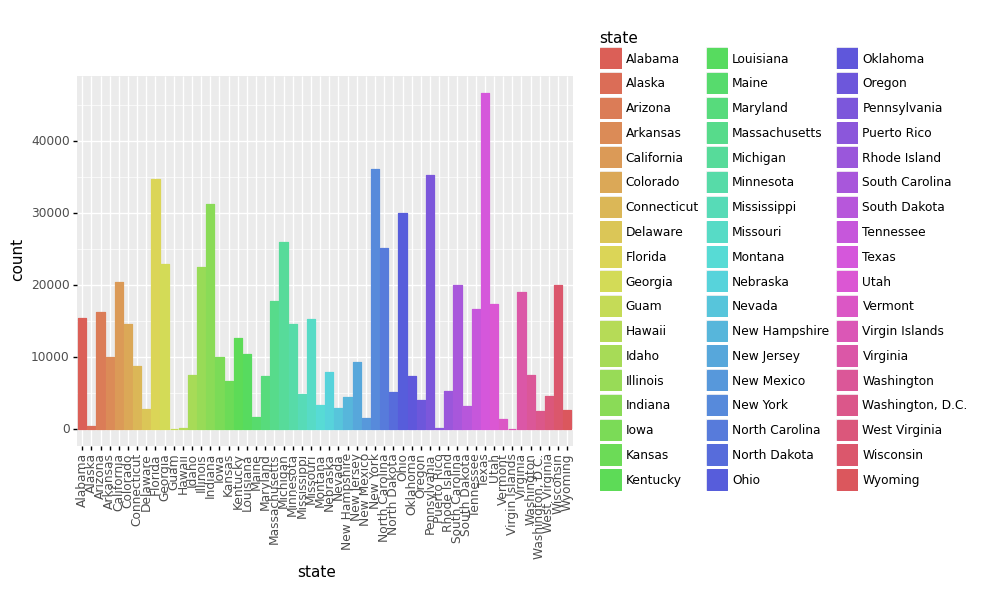

<ggplot: (149165711496)>

In [602]:
ggplot(df, aes(x='state', fill = 'state', weight='cases', colour = 'state')) + geom_bar(stat = 'count') + theme(axis_text_x  = element_text(angle = 90, hjust = 2))

Reading into the college dataset and creating a dataframe. 

In [679]:
df3= pd.read_csv('colleges.csv')
df3 = df3.replace(r'^\s*$', np.nan, regex=True)
df3.head()

,date,state,county,city,ipeds_id,college,cases,cases_2021,notes
0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN
1,2021-05-26,Alabama,Montgomery,Montgomery,100724,Alabama State University,2,NaN,NaN
2,2021-05-26,Alabama,Limestone,Athens,100812,Athens State University,45,10.0,NaN
3,2021-05-26,Alabama,Lee,Auburn,100858,Auburn University,2742,567.0,NaN
4,2021-05-26,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,220,80.0,NaN


Then we extracted the all the california colleges and its associated data and turned it into a datafarame. After we graphed the California college total cases to date using ggplot. We utilized aes and geom_bar with count and theme. 

C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.

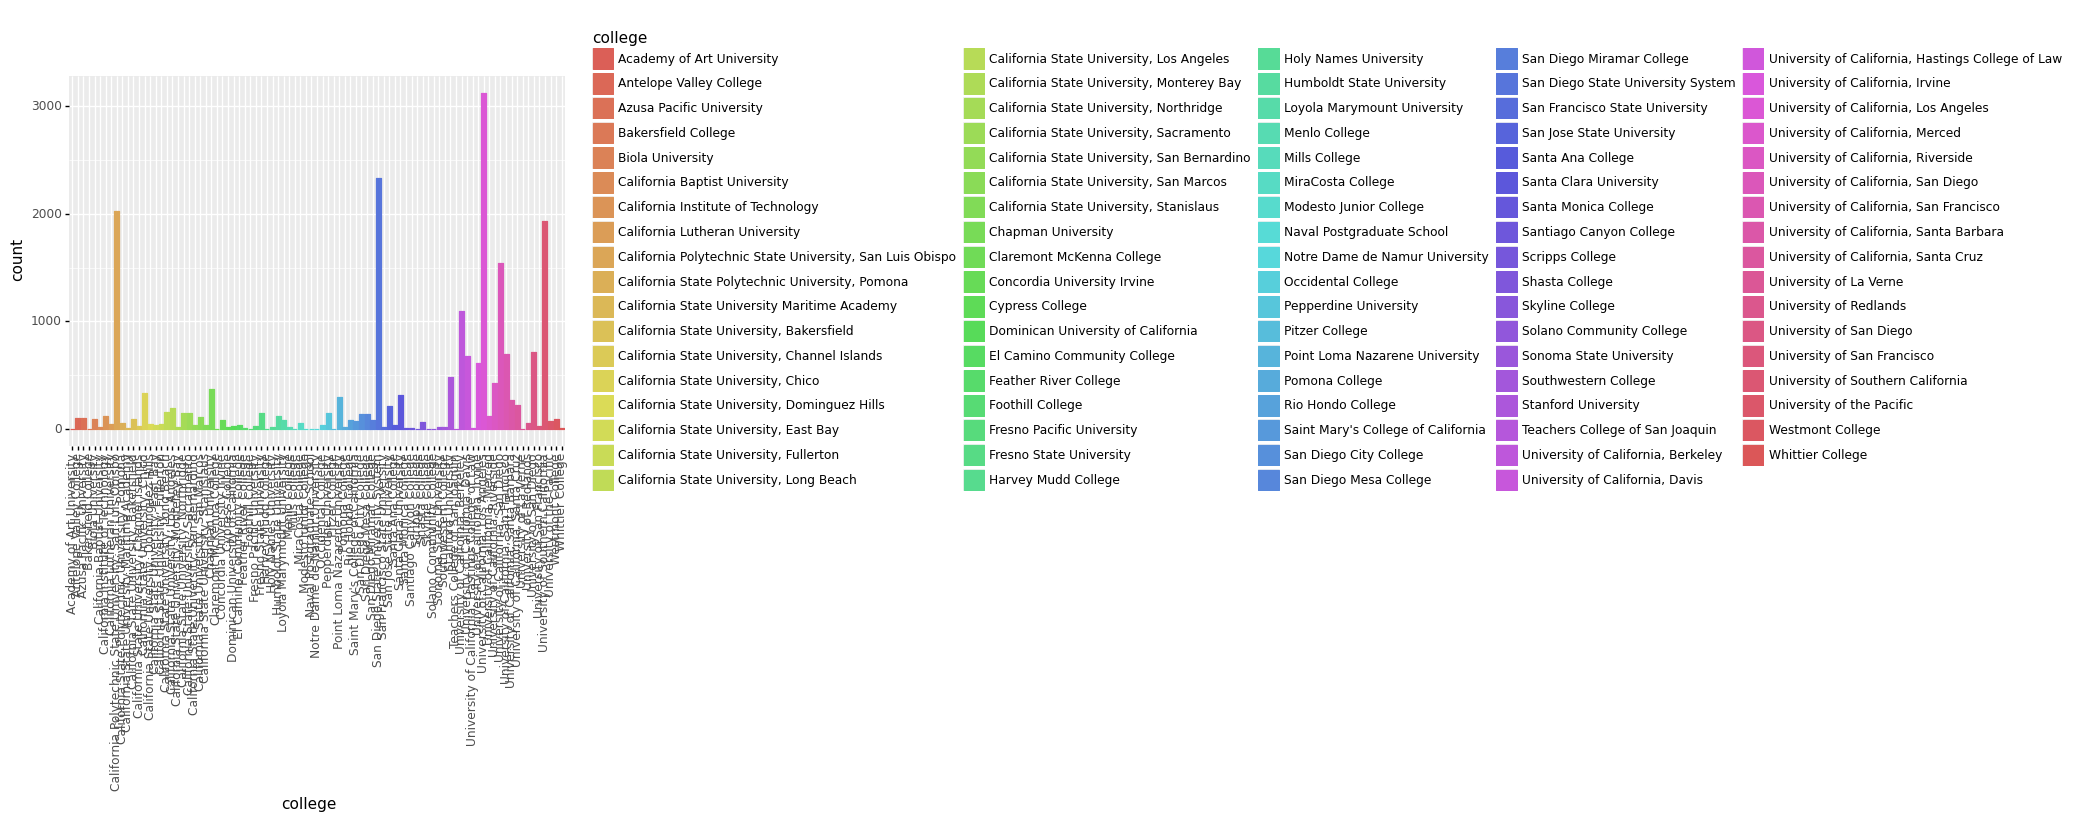

<ggplot: (149163879533)>

In [687]:
dfcalicollege= df3[df3['state'] == 'California'] 
ggplot(dfcalicollege, aes(x='college', fill = 'college', weight='cases', colour = 'college')) + geom_bar(stat = 'count') + theme(axis_text_x  = element_text(angle = 90, hjust = 2))

In [265]:
df4['tot']=df4['cases']+df4['cases_2021']
df4.head()

<ipython-input-265-43770067c656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,tot
146,2021-05-26,California,Alameda,Berkeley,110635,"University of California, Berkeley",1095,679.0,NaN,1774.0
147,2021-05-26,California,Yolo,Davis,110644,"University of California, Davis",678,555.0,NaN,1233.0
149,2021-05-26,California,Orange,Irvine,110653,"University of California, Irvine",617,276.0,NaN,893.0
150,2021-05-26,California,Los Angeles,Los Angeles,110662,"University of California, Los Angeles",3119,1461.0,NaN,4580.0
151,2021-05-26,California,Merced,Merced,445188,"University of California, Merced",124,63.0,NaN,187.0


We wanted to see the cases for the UCs and compre them so we grabbed those colleges only (this code appears later in the notebook). Then we plotted them using ggplot as shown below. UCLA has the most over number of cases. Then UCSD and Berkeley. 

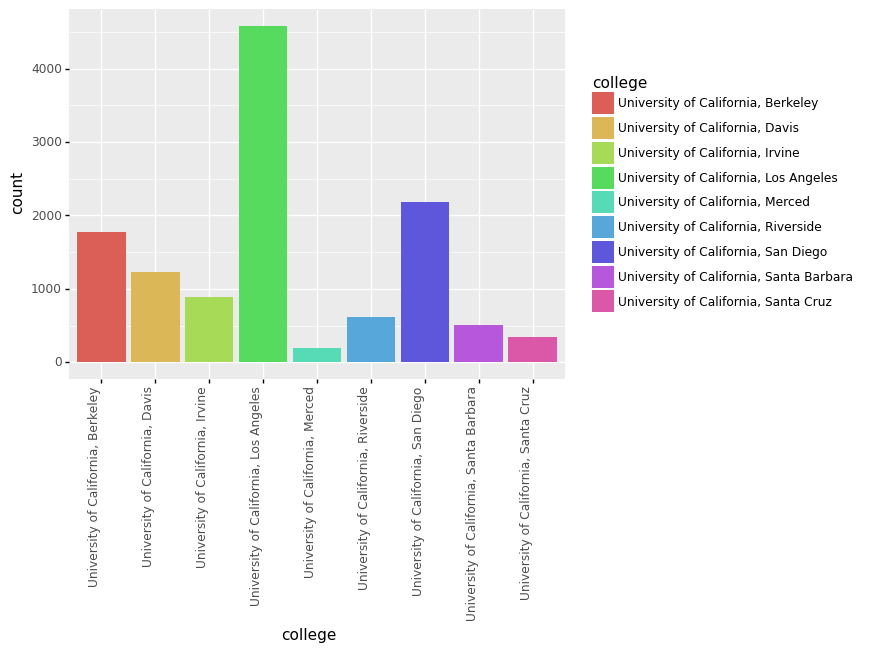

<ggplot: (149156278441)>

In [266]:
ggplot(df4, aes(x='college', weight = 'tot', fill = 'college')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

<h3>Simple Analysis of College Cases Vs County Cases with using of groupby, merge, ggplot, and matplotlib</h3>

In [267]:
#college data
df3.head()

,date,state,county,city,ipeds_id,college,cases,cases_2021,notes
0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN
1,2021-05-26,Alabama,Montgomery,Montgomery,100724,Alabama State University,2,NaN,NaN
2,2021-05-26,Alabama,Limestone,Athens,100812,Athens State University,45,10.0,NaN
3,2021-05-26,Alabama,Lee,Auburn,100858,Auburn University,2742,567.0,NaN
4,2021-05-26,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,220,80.0,NaN


In [561]:
#reading in the counties data
df4= pd.read_csv('counties.csv')
df4.head()

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2021-06-05,Autauga,Alabama,1001.0,7186,112.0,6006.0,101.0,1180.0,11.0
1,2021-06-05,Baldwin,Alabama,1003.0,21698,312.0,15241.0,234.0,6457.0,78.0
2,2021-06-05,Barbour,Alabama,1005.0,2342,59.0,1305.0,41.0,1037.0,18.0
3,2021-06-05,Bibb,Alabama,1007.0,2666,64.0,2138.0,40.0,528.0,24.0
4,2021-06-05,Blount,Alabama,1009.0,6906,139.0,5274.0,115.0,1632.0,24.0


**Implementation of groupby** We used groupby the total cases per county and summed it. We put this data into a dataframe. 

In [573]:
df5 = df4.groupby(['county'])[['cases']].agg('sum')
df5.head()

,cases
county,
Abbeville,2599
Acadia,6713
Accomack,2861
Ada,53011
Adair,8489


Renaming the cases to county to avoid odd renaming of columns when we merge this dataframe. We used pd.merge to merge this dataframe and the college dataframe on "county" so that so got the counties with colleges in them. 

In [270]:
df5.rename(columns = {'cases':'county cases'}, inplace = True)
dfm = pd.merge(df3, df5, on="county")
dfm.head()
dftest = dfm.replace(np.nan,0)
dftest.head()

,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,county cases
0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,0.0,0,147784
1,2021-05-26,Alabama,Madison,Huntsville,100706,University of Alabama in Huntsville,393,183.0,0,147784
2,2021-05-26,Florida,Madison,Madison,136145,North Florida College,35,17.0,0,147784
3,2021-05-26,Idaho,Madison,Rexburg,142522,Brigham Young University-Idaho,2655,876.0,0,147784
4,2021-05-26,Illinois,Madison,Edwardsville,149231,Southern Illinois University Edwardsville,472,160.0,0,147784


Using **ggplot** to plot cases for college in Arizona to see the numbers clearly.

C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide


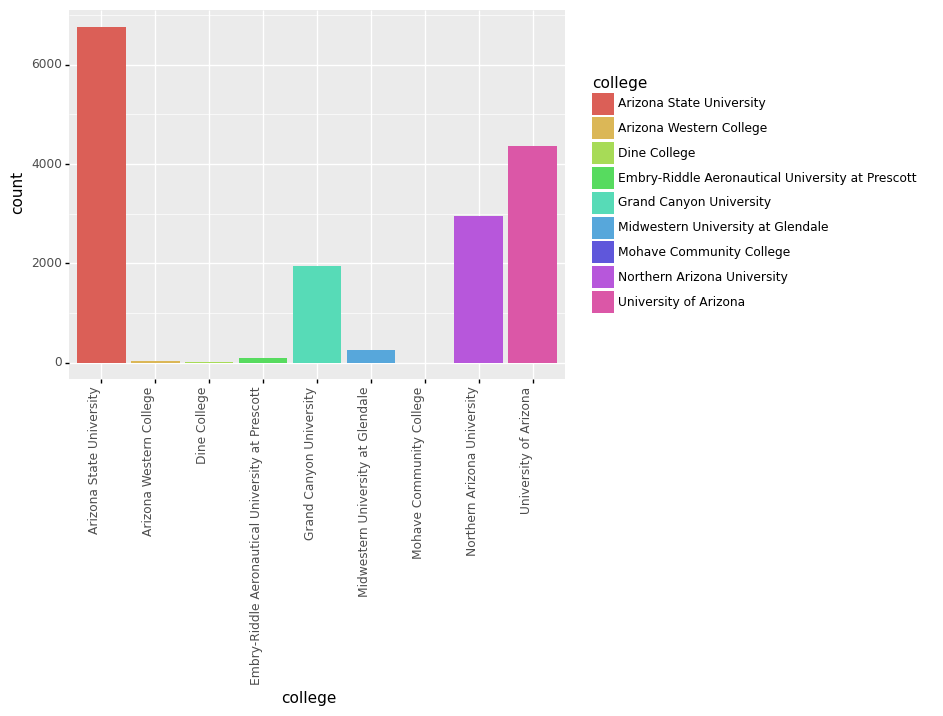

<ggplot: (149157476807)>

In [276]:
ggplot(df_arizona, aes(x='college', weight = 'cases', fill = 'college')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

**Using matplotlib** to plot colleges and the cases in their respective counties. From the bar graph we realized that the counties have far more cases than the colleges. So colleges seem to be safer. 

<AxesSubplot:xlabel='college'>

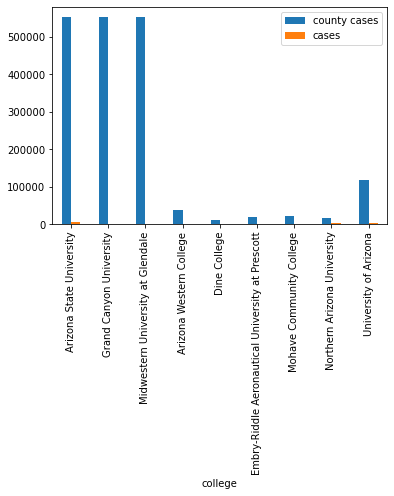

In [277]:
z = ['county cases', 'cases']
df_arizona.plot(x="college", y=z, kind="bar")

We wanted to do more analysis on this data so with our knowledge of the grammer of graphics we utilized ggplot to plot see the counties for Arionza but we wanted to see the colleges associated with them. This data shows that counties with more colleges in them (ie higher population) have more cases. 

C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide


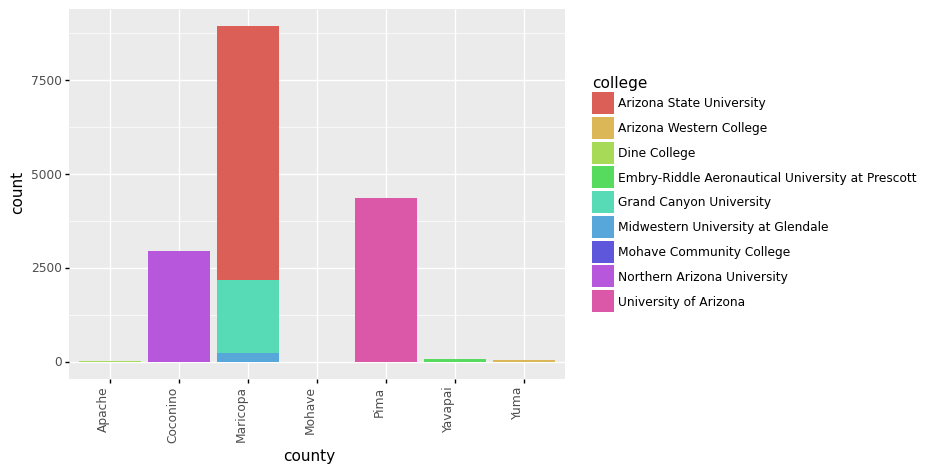

<ggplot: (149170478333)>

In [688]:
ggplot(df_arizona, aes(x='county', weight = 'cases', fill = 'college')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

<h1>Full Analysis</h1>

Now that we knew more about the cases and its relation to counties and colleges we wanted to analyize and compare it more using per capita rates

In [ ]:
#read in the college with per capita values to a dataframe
df= pd.read_csv('colleges_with_pop.csv')
df.head()

In [280]:
#read in the cases_per_capita for states.
df2= pd.read_csv('college_state_averages.csv')
df2.head()

,state,cases,cases_2021,num_students,cases_per_capita
0,Alabama,15457,3999.0,207112.0,0.074631
1,Alaska,430,133.0,38012.0,0.011312
2,Arizona,16171,5350.0,211258.0,0.076546
3,Arkansas,10041,2417.0,140555.0,0.071438
4,California,20451,9767.0,1299242.0,0.015741


**Used** merge to merge the county dataframe and the college dataframe on county.

In [694]:
dfm = pd.merge(df, df5, on="county")
dfm.head(1)

,Unnamed: 0,date,state,county,city,ipeds_id,college,cases_x,cases_2021,notes,2018.student.enrollment.undergrad_12_month,school.name,school.locale,id,num_students,cases_per_capita,locale_name,locale_name_detailed,cases_y
0,48,2021-05-26,Arkansas,Bent,Bentonville,367459,NorthWest Arkansas Community College,43,9.0,NaN,11098.0,NorthWest Arkansas Community College,13.0,367459,11098.0,0.003875,City: Small,"City: Small (population less than 100,000)",1544


In [697]:
#getting the california colleges
dfcalicollege= dfm[dfm['state'] == 'California'] 

**Using ggplot** to graph all the cases for california colleges. The counties are filled with the colors. We used aes and stat= count along with theme. From the data it looks like Los Angeles county has a lot of cases and there are alot of colleges in that county as well.

C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide
C:\Users\sabrn\anaconda3\lib\site-packages\plotnine\stats\stat_count.py:66: RuntimeWarning: invalid value encountered in true_divide


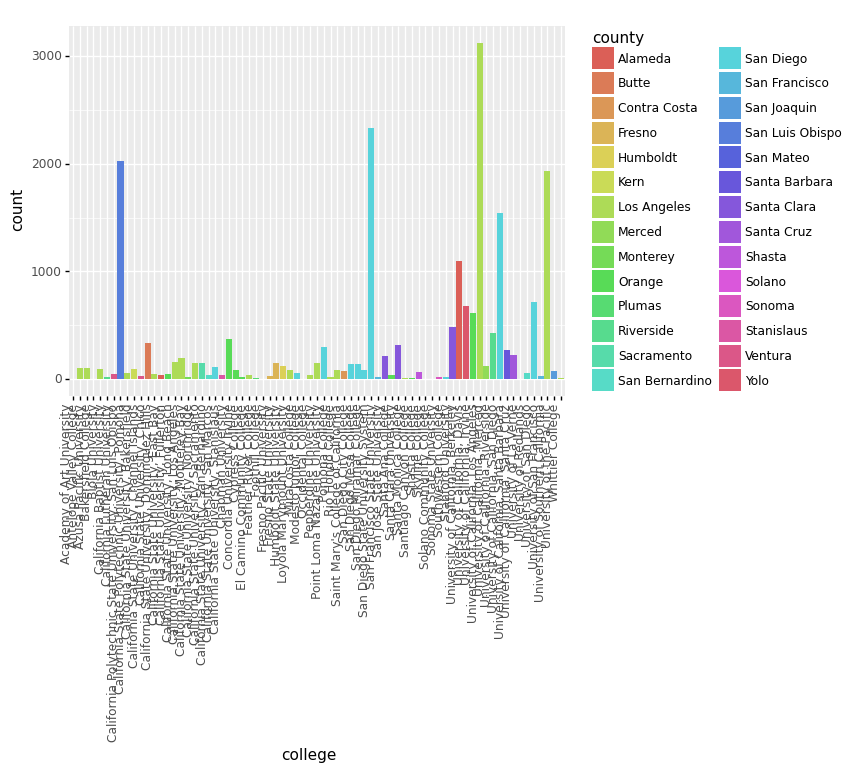

<ggplot: (149154536096)>

In [283]:
ggplot(dfcalicollege, aes(x='college', weight = 'cases', fill = 'county')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

In [284]:
#grabbing jus the uc data with some dataframe manipulation and extraction.
dfuc= dfcalicollege[(dfcalicollege['college'] == 'University of California, Davis') | (dfcalicollege['college'] == 'University of California, Merced')
                  | (dfcalicollege['college'] == 'University of California, Los Angeles')
                  | (dfcalicollege['college'] == 'University of California, Riverside')
                  | (dfcalicollege['college'] == 'University of California, Irvine')
                  | (dfcalicollege['college'] == 'University of California, Santa Cruz')
                  | (dfcalicollege['college'] == 'University of California, Santa Barbara')
                  | (dfcalicollege['college'] == 'University of California, San Diego')
                  | (dfcalicollege['college'] == 'University of California, Berkeley')] 
dfuc.head()

,Unnamed: 0,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,2018.student.enrollment.undergrad_12_month,school.name,school.locale,id,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases
142,119,2021-05-26,California,Orange,Irvine,110653,"University of California, Irvine",617,276.0,NaN,30865.0,University of California-Irvine,11.0,110653,30865.0,0.019990,City: Large,"City: Large (population of 250,000 or more)",486025
168,120,2021-05-26,California,Los Angeles,Los Angeles,110662,"University of California, Los Angeles",3119,1461.0,NaN,33160.0,University of California-Los Angeles,11.0,110662,33160.0,0.094059,City: Large,"City: Large (population of 250,000 or more)",1245330
195,123,2021-05-26,California,San Diego,San Diego,110680,"University of California, San Diego",1543,635.0,Total is known to include one or more cases fr...,30143.0,University of California-San Diego,11.0,110680,30143.0,0.051189,City: Large,"City: Large (population of 250,000 or more)",280619
203,117,2021-05-26,California,Alameda,Berkeley,110635,"University of California, Berkeley",1095,679.0,NaN,32309.0,University of California-Berkeley,12.0,110635,32309.0,0.033891,City: Midsize,"City: Midsize (population of at least 100,000 ...",89112
208,125,2021-05-26,California,Santa Cruz,Santa Cruz,110714,"University of California, Santa Cruz",228,121.0,NaN,18534.0,University of California-Santa Cruz,13.0,110714,18534.0,0.012302,City: Small,"City: Small (population less than 100,000)",24242


In [698]:
#reading a dataset into a dataframe to get the population for each county in the United states
df3= pd.read_csv('county_pops.csv')
df3.head()

,Unnamed: 0,STNAME,CTYNAME,POPESTIMATE2020
0,1,Alabama,Autauga County,56145
1,2,Alabama,Baldwin County,229287
2,3,Alabama,Barbour County,24589
3,4,Alabama,Bibb County,22136
4,5,Alabama,Blount County,57879


We manupilated the dataframe and removed the word "county" using **str.replace** so that we could combine it with the college dataframe. 

In [699]:
df3.rename(columns = {'POPESTIMATE2020':'county pop'}, inplace = True)
df3.rename(columns = {'CTYNAME':'county'}, inplace = True)

df3['county']=df3['county'].str.replace('County','')
df3['county'] = df3['county'].str[:-1]

In [530]:
df3.rename(columns = {'STNAME':'state'}, inplace = True)
df3.head()

,Unnamed: 0,state,county,county pop
0,1,Alabama,Autauga,56145
1,2,Alabama,Baldwin,229287
2,3,Alabama,Barbour,24589
3,4,Alabama,Bibb,22136
4,5,Alabama,Blount,57879


**Merge:** Used merge to merge dfm and population dataframe and county and state to make sure they get the correct ones. I read this merge into a master dataframe

In [532]:
dfmaster = pd.merge(dfm, df3, on=['county','state'])
dfmaster.head(2)

,Unnamed: 0_x,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,...,school.name,school.locale,id,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop
0,0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN,...,Alabama A & M University,12.0,100654,5343.0,0.007674,City: Midsize,"City: Midsize (population of at least 100,000 ...",147784,45,379453
1,20,2021-05-26,Alabama,Madison,Huntsville,100706,University of Alabama in Huntsville,393,183.0,NaN,...,University of Alabama in Huntsville,12.0,100706,8145.0,0.048250,City: Midsize,"City: Midsize (population of at least 100,000 ...",147784,45,379453


Getting the cases per capita for the counties by dividing county cases column of a dataframe with the county pop column.

In [653]:
dfmaster['county_cases_per_capita'] = dfmaster['county cases']/dfmaster['county pop']
dfmaster.head(1)

,Unnamed: 0_x,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,...,id,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop,prop of col cases to county cases,county_cases_per_capita
0,0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN,...,100654,5343.0,0.007674,City: Midsize,"City: Midsize (population of at least 100,000 ...",147784,45,379453,0.000277,0.389466


**Extracting** California data from the dataframe. 

In [654]:

df_ny = dfmaster[dfmaster['state'] == 'California'] 
df_ny.head(1)

,Unnamed: 0_x,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,...,id,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop,prop of col cases to county cases,county_cases_per_capita
138,107,2021-05-26,California,Orange,Santa Ana,121619,Santa Ana College,37,12.0,NaN,...,121619,35606.0,0.001039,City: Large,"City: Large (population of 250,000 or more)",486025,221,3166857,0.000076,0.153472


In [655]:
# rereading the ucs. This code was used to get the UCs.
dfuc= df_ny[(df_ny['college'] == 'University of California, Davis') | (df_ny['college'] == 'University of California, Merced')
                  | (df_ny['college'] == 'University of California, Riverside')
                  | (df_ny['college'] == 'University of California, Irvine')
                  | (df_ny['college'] == 'University of California, Santa Cruz')
                  | (df_ny['college'] == 'University of California, Santa Barbara')
                  | (df_ny['college'] == 'University of California, San Diego')
                  | (df_ny['college'] == 'University of California, Berkeley')] 
dfuc.head(1)

,Unnamed: 0_x,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,...,id,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop,prop of col cases to county cases,county_cases_per_capita
140,119,2021-05-26,California,Orange,Irvine,110653,"University of California, Irvine",617,276.0,NaN,...,110653,30865.0,0.01999,City: Large,"City: Large (population of 250,000 or more)",486025,221,3166857,0.001269,0.153472


**Simple conclusion:** Using **matplotlib** we used the bar plot to plot the per capita cases for both the county and the college. Based on this graph and our analysis from before it looks like the colleges are doing alot better than their respective counties in terms of cases.

<AxesSubplot:xlabel='college'>

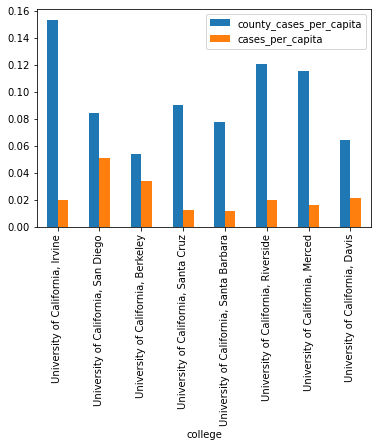

In [656]:
a = ['county_cases_per_capita', 'cases_per_capita']
dfuc.plot(x="college", y=a, kind="bar")

In [700]:
df_ari = dfmaster[dfmaster['state'] == 'Delaware'] 
#df_ari[~df_ari.state.str.contains("Alcorn State University")]
df_ari.head(1)

,Unnamed: 0_x,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,...,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop,prop of col cases to county cases,county_cases_per_capita,prop_of_per_capita_colvscounty
287,184,2021-05-26,Delaware,New Castle,New Castle,131113,Wilmington University,0,NaN,NaN,...,11496.0,0.0,Suburb: Large,"Suburb: Large (outside principal city, in urba...",64656,326,561531,0.0,0.115142,0.0


**Simple Conclusion** Used **ggplot** to graph per capita for colleges and their respective counties for Delaware. This also shows that colleges have less cases per capita than counties supporting our findings. 

<AxesSubplot:xlabel='college'>

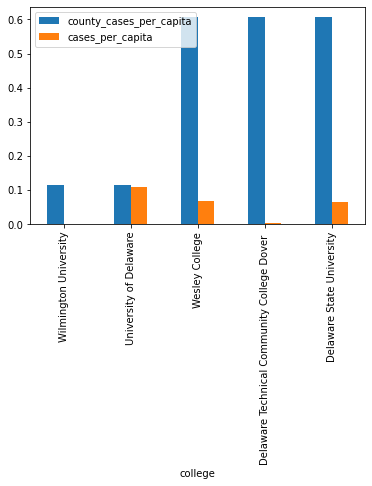

In [658]:
df_ari.plot(x="college", y=a, kind="bar")

**Getting the mean of per capita**: I used the mean function from **numpy** to get the means of the per capita for the counties and the colleges.

In [659]:
a = dfmaster["cases_per_capita"].mean()
b = dfmaster["county_cases_per_capita"].mean()
print(a,b)

0.05448130921672235 0.4715941819583466


In [660]:
#reading it into a dataframe
data = [['college', a], ['county', b]]
df6 = pd.DataFrame(data, columns = ['college','per capita'])
df6.head()

,college,per capita
0,college,0.054481
1,county,0.471594


**Simple Conclusion:** We used **matplotlib** to plot the mean per capita for both the counties and colleges in the US. This also supports our findings that colleges are in general safer than their respective counties as there are less cases.

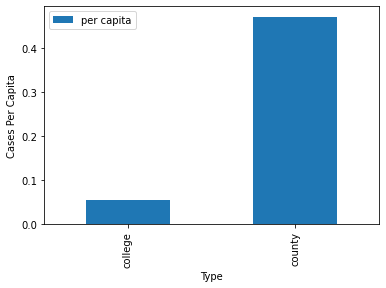

In [661]:
df6.plot(x="college", y='per capita', kind="bar")
plt.xlabel("Type")
plt.ylabel("Cases Per Capita")
plt.show()

In [662]:
#rename dfny to dfc.
dfc=df_ny
df3.head()

,Unnamed: 0,state,county,county pop
0,1,Alabama,Autauga,56145
1,2,Alabama,Baldwin,229287
2,3,Alabama,Barbour,24589
3,4,Alabama,Bibb,22136
4,5,Alabama,Blount,57879


In [663]:
#counties that have colleges in cali
dfc.head()

,Unnamed: 0_x,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,...,id,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop,prop of col cases to county cases,county_cases_per_capita
138,107,2021-05-26,California,Orange,Santa Ana,121619,Santa Ana College,37,12.0,NaN,...,121619,35606.0,0.001039,City: Large,"City: Large (population of 250,000 or more)",486025,221,3166857,0.000076,0.153472
139,110,2021-05-26,California,Orange,Orange,399212,Santiago Canyon College,14,6.0,NaN,...,399212,15808.0,0.000886,City: Midsize,"City: Midsize (population of at least 100,000 ...",486025,221,3166857,0.000029,0.153472
140,119,2021-05-26,California,Orange,Irvine,110653,"University of California, Irvine",617,276.0,NaN,...,110653,30865.0,0.019990,City: Large,"City: Large (population of 250,000 or more)",486025,221,3166857,0.001269,0.153472
141,74,2021-05-26,California,Orange,Fullerton,110565,"California State University, Fullerton",45,23.0,NaN,...,110565,40621.0,0.001108,Suburb: Large,"Suburb: Large (outside principal city, in urba...",486025,221,3166857,0.000093,0.153472
142,84,2021-05-26,California,Orange,Irvine,112075,Concordia University Irvine,82,59.0,NaN,...,112075,2046.0,0.040078,City: Large,"City: Large (population of 250,000 or more)",486025,221,3166857,0.000169,0.153472


Used multiple **merge** in the dataframe and **renamed columns** to create a new dataframe that does not have the counties with colleges in california. 

In [664]:
#df3 has all counties.
dfcopy = pd.merge(df3, dfc, on=['county'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
dfcopy.rename(columns = {'state_x':'state'}, inplace = True)
dftest1 = pd.merge(df3, dfcopy, on=['county','state'])
dftest = dftest1[dftest1['state'] == 'California'] 
 
#dftest = pd.merge(df3, dfcopy, on=['county','state'])
dftest.head()

,Unnamed: 0_x,state,county,county pop,Unnamed: 0_y,county pop_x,Unnamed: 0_x,date,state_y,city,...,id,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop_y,prop of col cases to county cases,county_cases_per_capita
186,193,California,Alpine,1119,193,1119,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,194,California,Amador,40083,194,40083,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,196,California,Calaveras,46308,196,46308,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,197,California,Colusa,21558,197,21558,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,199,California,Del Norte,27968,199,27968,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [665]:
#list of counties that do not have a college in california. 
a=dftest['county'].tolist()
print(a)

['Alpine', 'Amador', 'Calaveras', 'Colusa', 'Del Norte', 'El Dorado', 'Glenn', 'Imperial', 'Inyo', 'Kings', 'Lake', 'Lassen', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Napa', 'Nevada', 'Placer', 'San Benito', 'Sierra', 'Siskiyou', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Yuba']


In [666]:
df5.head()

,cases
county,
Abbeville,2599
Acadia,6713
Accomack,2861
Ada,53011
Adair,8489


Using **merge** to merge the dataframes on county to get their cases. From their we **manipulated** the dataframe to add a column for the cases per capita for non college cites by dividing the "cases_y" column by the "county pop" column.  

In [667]:
df_col_vs_non = pd.merge(dftest, df5, on=['county'])
df_col_vs_non['non college city cases per capita'] = df_col_vs_non['cases_y']/df_col_vs_non['county pop']
df_col_vs_non.head()

,Unnamed: 0_x,state,county,county pop,Unnamed: 0_y,county pop_x,Unnamed: 0_x,date,state_y,city,...,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop_y,prop of col cases to county cases,county_cases_per_capita,cases_y,non college city cases per capita
0,193,California,Alpine,1119,193,1119,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,0.079535
1,194,California,Amador,40083,194,40083,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3689,0.092034
2,196,California,Calaveras,46308,196,46308,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2186,0.047206
3,197,California,Colusa,21558,197,21558,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2265,0.105065
4,199,California,Del Norte,27968,199,27968,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1439,0.051452


**Simple conclusion:** Using **numpy** we got the mean for cases per capita for college counties and non college counties. Then we created a dataframe using those values. Then we used **matplotlib** to plot the per capita for non college vs college counties. We found that in California college counties have less cases per capita than non college counties. This shows that college counties are in general safer.

0.10047863792594053 0.18467985393510372


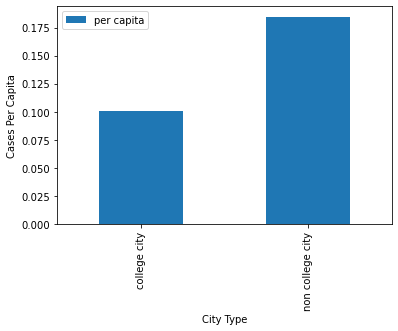

In [669]:
#graph shows the difference in cases per capita for college towns in California vs non college towns in california. 
uni = dfc["county_cases_per_capita"].mean() 
non = df_col_vs_non["non college city cases per capita"].mean()
print(uni,non)
data = [['college city', uni], ['non college city', non]]
df7 = pd.DataFrame(data, columns = ['city type','per capita'])
df7.head()
df7.plot(x="city type", y='per capita', kind="bar")
plt.xlabel("City Type")
plt.ylabel("Cases Per Capita")
plt.show()

We wanted to do some more simple analysis through visualization of data. So we wanted to see the proportion of cases of colleges to cases of counties. So we **manipulated** the dataframe to include this column by dividing cases by county cases. Then I used **groupby** to get the mean of this new column per state and I loaded this into a new dataframe. I then **manipulated** the dataframe by renaming the columns.  

In [670]:
dfmaster['prop of col cases to county cases'] = dfmaster['cases']/dfmaster['county cases']
dfmaster.head()
dfstates=dfmaster.groupby(['state'], as_index = False)[['prop of col cases to county cases']].mean()
#dfstates = dfmaster.groupby(['state'])[['prop of col cases to county cases']].agg('mean')
dfstates.rename(columns = {'prop of col cases to county cases':'ave prop of col cases to county cases per state'}, inplace = True)
dfstates.rename(columns = {'state':'states'}, inplace = True)
dfstates.head()

,states,ave prop of col cases to county cases per state
0,Alabama,0.014423
1,Arizona,0.028220
2,Arkansas,0.030698
3,California,0.003931
4,Colorado,0.028378


**Simple Conclusion:** Used **ggplot** to plot this proportion of cases. Utilized grammer of graphics by using stat and aes. Based on this data we can conclude that Idaho is the worst in terms of proportion of cases in colleges and their respective counties. That means that both the counties with colleges in Idaho is doing bad in terms of cases as the number of cases in the college is nearing the number of cases in the counties. So it shows the colleges (and ie the college towns) are doing bad in terms of handling their cases. Missouri, Neveda, Nebraska, Ohio, and Washington are also doing bad. So the college in these counties are doing bad in terms of containing their cases as their cases are nearing the number of cases of the counties. 

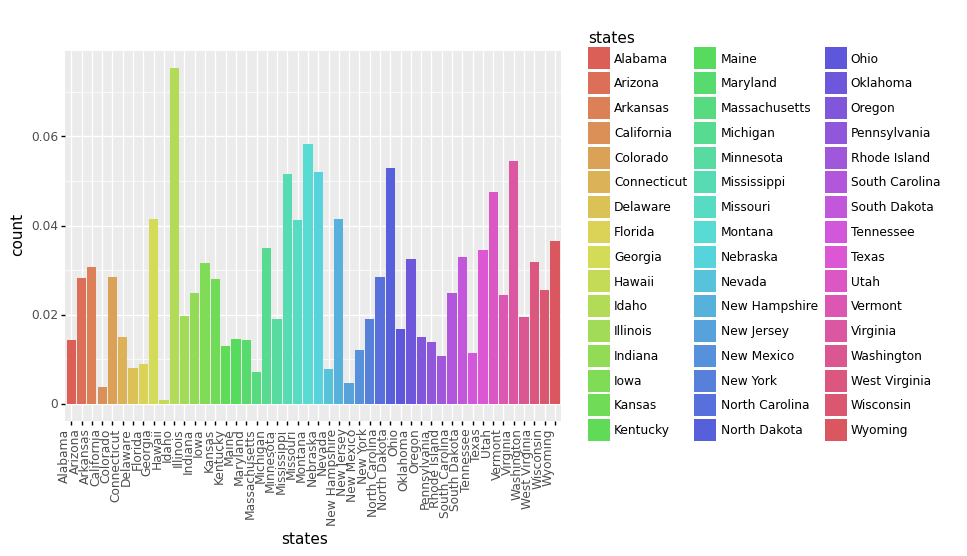

<ggplot: (149166462151)>

In [672]:
#average proportion of cases in colleges vs cases in counties per state
ggplot(dfstates, aes(x='states', weight = 'ave prop of col cases to county cases per state', fill = 'states')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

**Manipulated** the dataframe to get the proportion of cases per capita of the colleges vs the counties.

In [674]:
dfmaster['prop_of_per_capita_colvscounty']=dfmaster['cases_per_capita']/dfmaster['county_cases_per_capita']
dfmaster.head(2)

,Unnamed: 0_x,date,state,county,city,ipeds_id,college,cases,cases_2021,notes,...,num_students,cases_per_capita,locale_name,locale_name_detailed,county cases,Unnamed: 0_y,county pop,prop of col cases to county cases,county_cases_per_capita,prop_of_per_capita_colvscounty
0,0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN,...,5343.0,0.007674,City: Midsize,"City: Midsize (population of at least 100,000 ...",147784,45,379453,0.000277,0.389466,0.019703
1,20,2021-05-26,Alabama,Madison,Huntsville,100706,University of Alabama in Huntsville,393,183.0,NaN,...,8145.0,0.048250,City: Midsize,"City: Midsize (population of at least 100,000 ...",147784,45,379453,0.002659,0.389466,0.123889


We used **groupby** state and **numpy** function mean to get all the means of the proportion of per capita of cases per state. We read this into a dataframe.

Then we used **ggplot** to plot the proportion of cases per capita for the states.

**Simple Conclusion** Based on this graph Connecticut, North Carolina, New Hampshire, South Dakota, and Wisconsin is doing bad in terms of proportion of cases per capita of colleges and counties because their proportion is over 0.5. This means the cases per capita of the college is more than half of the cases per capita of the county. This shows that the college (and so the towns the college is in as well) is doing bad in terms of the cases as the per capita is almost as high as the county per capita cases. So these states are doing the worst in terms of proportion cases per capita of the college vs county.

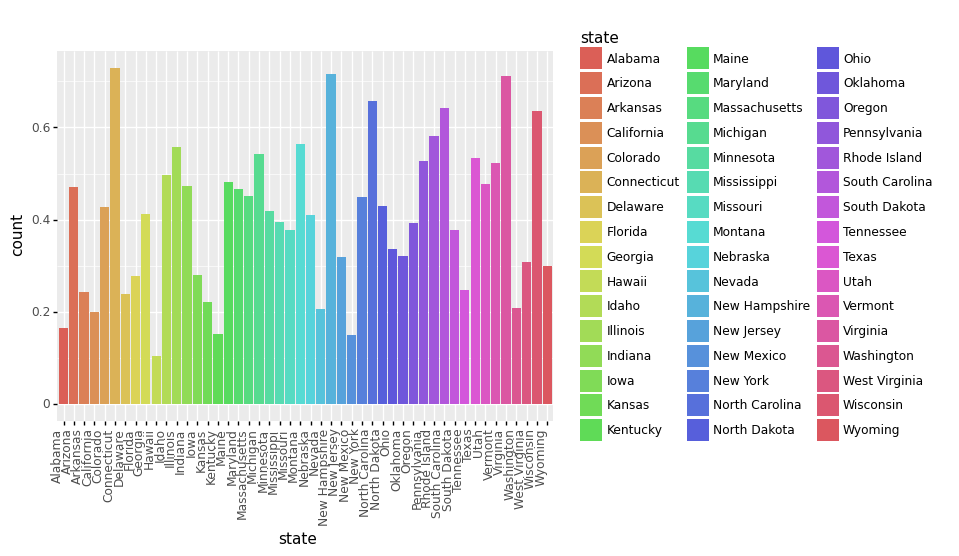

<ggplot: (149166680938)>

In [676]:
dfstate=dfmaster.groupby(['state'], as_index = False)[['prop_of_per_capita_colvscounty']].mean()
#dfstates = dfmaster.groupby(['state'])[['prop of col cases to county cases']].agg('mean')
dfstate.head()
#average proportion of cases in colleges vs cases in counties per state
ggplot(dfstate, aes(x='state', weight = 'prop_of_per_capita_colvscounty', fill = 'state')) + geom_col(stat = "count",) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))